In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

import examine_coord_distributions as ecd
import os

In [2]:
base_dir = '/Users/settwi/grad_school/glesener/geant/impress/analysis/double-peak-analysis/crystal-hits-positions'
data_dirs = [
#     'full-662keV-5mm',
    'full-30keV-5mm'
]
base_data_fn = 'c1-cryst-out.tab'

cryst_hit_data = dict()
for d in data_dirs:
    data_file = os.path.join(base_dir, d, base_data_fn)
    energies, channels, positions = ecd.load_data(data_file)
    cryst_hit_data[d] = dict(energies=energies, channels=channels, positions=positions)

In [3]:
def histogram_crystal_positions(positions, **kw):
    z_positions = list()
    for multiple in positions:
        z_positions.append([p[2] for p in multiple])
    return np.histogram([e for multiple in z_positions for e in multiple], bins=50, **kw)

<IPython.core.display.Javascript object>


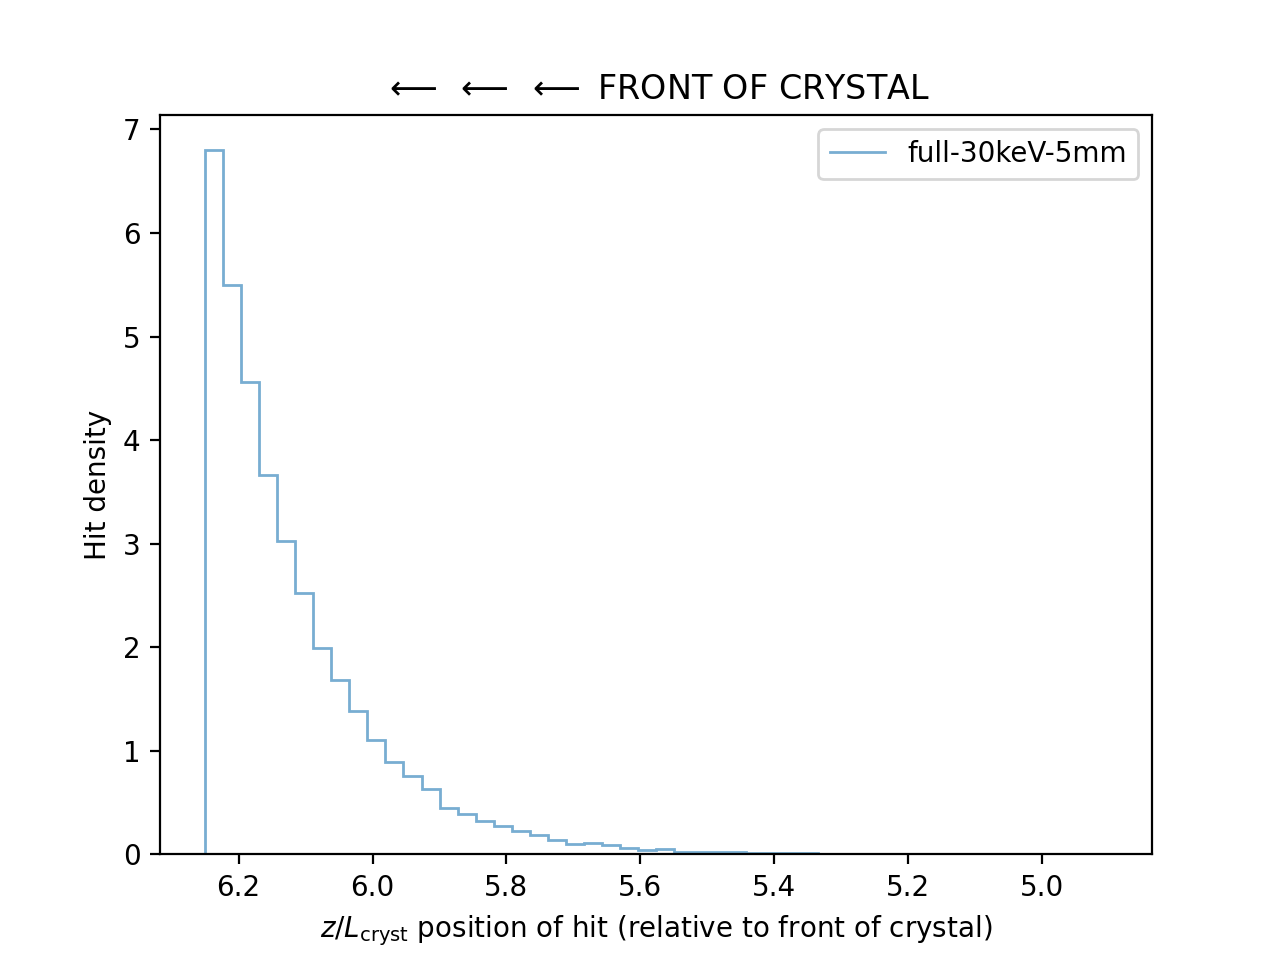

In [4]:
fig, ax = plt.subplots()
pos_histograms = dict()

for k, v in cryst_hit_data.items():
    hg, edges = histogram_crystal_positions(v['positions'], density=True)
    pos_histograms[k] = dict(hg=hg, edges=edges)

single_30_done = False
for k, v in pos_histograms.items():
    if '662' not in k and single_30_done: continue
    single_30_done |= '30' in k
    
    extent = v['edges'].max() - v['edges'].min()
    normed_edges = v['edges']#(v['edges'] - v['edges'].max()) / extent
    dens = v['hg'] / (np.diff(normed_edges)[0] * v['hg'].sum())
    
    _ = ax.stairs(dens, normed_edges, label=k, alpha=0.6, fill=False)

ax.legend()
ax.set_title('$\\longleftarrow$ $\\longleftarrow$ $\\longleftarrow$ FRONT OF CRYSTAL')
ax.set_ylabel('Hit density')
ax.set_xlabel('$z / L_\\mathrm{cryst}$ position of hit (relative to front of crystal)')
ax.invert_xaxis()
plt.show()

In [7]:
num_bins_incl = 3
k = 'full-30keV-5mm'
np_eng = np.array(cryst_hit_data[k]['energies'])
z_positions = [[r[2] for r in multiple] for multiple in cryst_hit_data[k]['positions']]

z_edge_cond = np.zeros_like(np_eng, dtype=bool)
for i, hit_zs in enumerate(z_positions):
    z_edge_cond[i] = any(edges[0] < p and p < edges[num_bins_incl] for p in hit_zs)
    z_edge_cond[i] |= any(edges[-(num_bins_incl+1)] < p and p < edges[-1] for p in hit_zs)

<IPython.core.display.Javascript object>


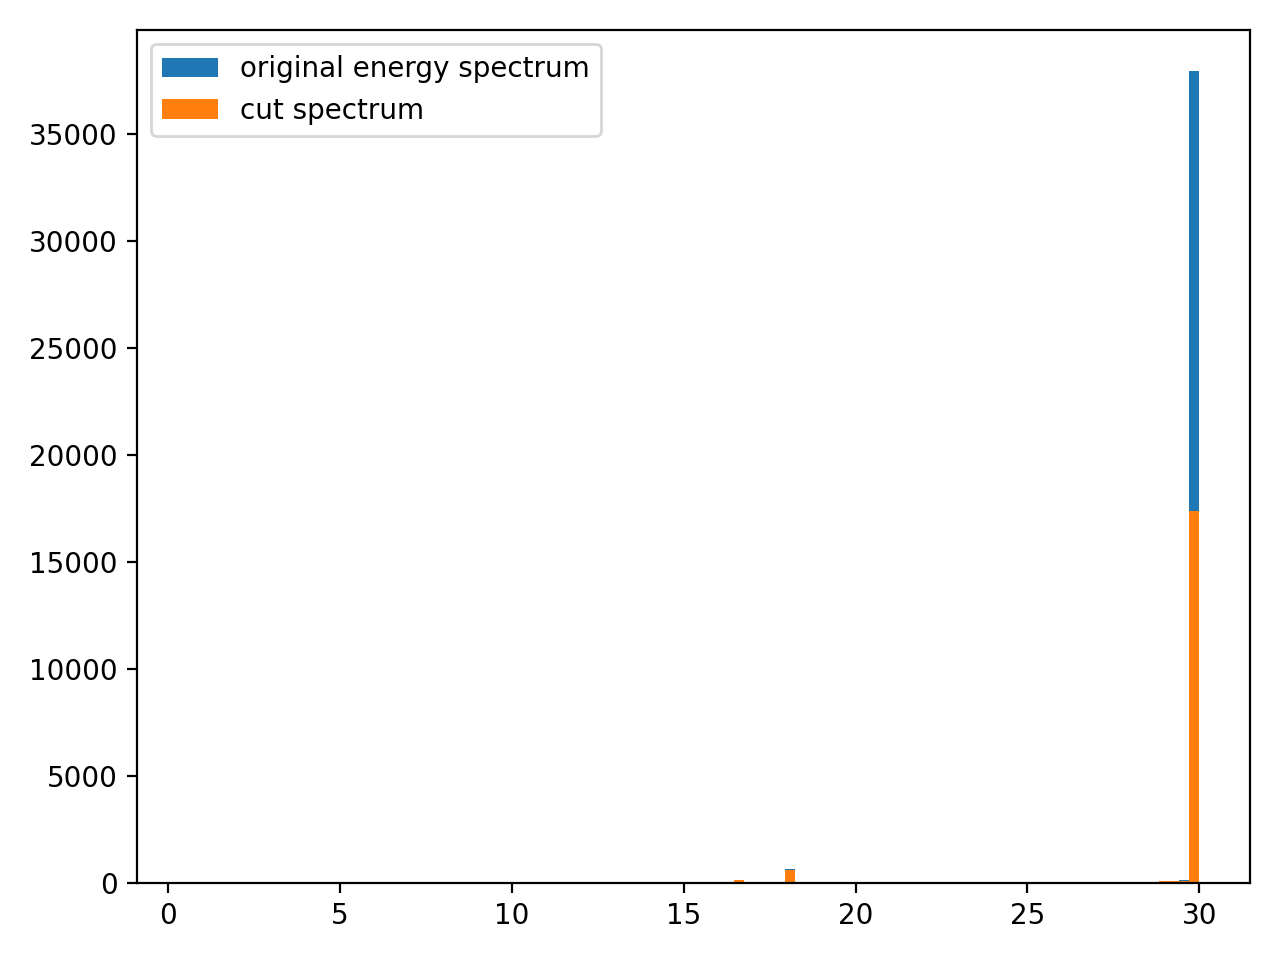

In [8]:
fig, ax = plt.subplots()
_, edges, _ = ax.hist(np_eng, bins=100, label='original energy spectrum')
ax.hist(np_eng[z_edge_cond], bins=edges, label='cut spectrum')
ax.legend()
fig.tight_layout()